In [1]:
CLIENT_ID = 'LTIA5VAB2CMSBNPLXEINQFW0JOLQG4QC2ZZRMEP4R3K0YZNC' # your Foursquare ID
CLIENT_SECRET = 'IC4L4IPJBCGQXPWOBJVZPRV3HETXQIQSTHTC31JYY3JN4A4L' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

# THE BATTLE OF NEIGHBORHOODS

___

# INTRODUCTION SECTION

## 1. Description of the problem and a discussion of the background.

### Problem: Choosing the best neighborhood to live in NY and for me this means having vegetarian/vegan restaurant close, having good coffee shop close and as well having a nice park where for running.



#### I will be moving to New York next year and I'm looking for a neighborhood. The neighboor will have to have at least 3 vegan restaurant in a ratio of 1000 meters, two nice coffee shop to have a good cappuccino there with good rating and a park for jogging there.

#### Let's see if we find a neighborhood like this which matchs the criteria describe above.

#### Questions that we are going to answer using data:
#### 1. Which neighboorhood in New York has at least 3 vegan restaurant?
#### 2. Which neighboorhood in New York has at least two nice coffe shop?
#### 3. Which neighboorhood has a park in New York has?

####  

Why I like New York so much:

The City of New York, usually known as either New York City (NYC), or simply New York (NY), is the most populous city in the United States. With an estimated 2018 population of 8,398,748 distributed over about 302.6 square miles (784 km2), New York is also the most densely populated major city in the United States. Located at the southern tip of the U.S. state of New York, the city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass. With almost 20 million people in its metropolitan statistical area and approximately 23 million in its combined statistical area, it is one of the world's most populous megacities. New York City has been described as the cultural, financial, and media capital of the world, significantly influencing commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. Home to the headquarters of the United Nations, New York is an important center for international diplomacy.

Situated on one of the world's largest natural harbors, New York City is divided into five administrative boroughs, each of which is a separate county of the State of New York. The five boroughs – Brooklyn, Queens, Manhattan, The Bronx, and Staten Island – were consolidated into a single city in 1898. The city and its metropolitan area constitute the premier gateway for legal immigration to the United States. As many as 800 languages are spoken in New York, making it the most linguistically diverse city in the world. New York is home to 3.2 million residents born outside the United States, the largest foreign-born population of any city in the world as of 2016. As of 2019, the New York metropolitan area is estimated to produce a gross metropolitan product (GMP) of $2.0 trillion. If greater New York City were a sovereign state, it would have the 12th highest GDP in the world. New York is home to the highest number of billionaires of any city in the world.

___

# DATA SECTION

## 2. Description of the data and how it will be used to solve the problem. 

### We will use the Foursquare API to answer the first two question. 
We will divide the first two question in small question and we will plot some partial result.
For the question number 3 we will use de Google Maps API to find out with neighboorhoods has a park for running.

### The dataset that we will use is located in https://geo.nyu.edu/catalog/nyu_2451_34572
We will answer the 3 main questions above using the Foursquare API to find the Vegatarian/Vegan restaurants in New York and the Google Places API to find the parks we will provide the input latitude and longitude of each neighborhood and we will specific the type of place as "park"
More information about how to use the Google Places API can be found here: https://developers.google.com/places/web-service/intro
https://developers.google.com/places/web-service/search

___

# METHODOLOGY SECTION

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

#### Load and explore the data

In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
neighborhoods_data = newyork_data['features']

#### Tranform the data into a *pandas* dataframe

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Then let's loop through the data and fill the dataframe one row at a time.

In [7]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Let's check the boroughs in New York

In [8]:
neighborhoods['Borough'].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

#### Use geopy library to get the latitude and longitude values of New York City.

In [9]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [10]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [11]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [12]:
neighborhoods.shape

(306, 4)

## Explore Neighborhoods in New York

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
LIMIT = 100

In [31]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [35]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'], 
                                   latitudes=manhattan_data['Latitude'], 
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill


KeyError: 'groups'

In [34]:
manhattan_venues.head()

NameError: name 'manhattan_venues' is not defined

In [21]:
manhattan_veg_restaurants = manhattan_venues[manhattan_venues['Venue Category'] == 'Vegetarian / Vegan Restaurant'].reset_index(drop=True)
manhattan_veg_restaurants.shape[0]

22

In [22]:
manhattan_coffee_shops = manhattan_venues[manhattan_venues['Venue Category'] == 'Coffee Shop'].reset_index(drop=True)
manhattan_coffee_shops.shape[0]

132

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [24]:
bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_venues = getNearbyVenues(names=bronx_data['Neighborhood'],
                                   latitudes=bronx_data['Latitude'],
                                   longitudes=bronx_data['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


In [25]:
bronx_veg_restaurants = bronx_venues[bronx_venues['Venue Category'] == 'Vegetarian / Vegan Restaurant'].reset_index(drop=True)
bronx_coffee_shops = bronx_venues[bronx_venues['Venue Category'] == 'Coffee Shop'].reset_index(drop=True)

In [26]:
bronx_veg_restaurants.shape[0]

1

In [40]:
bronx_coffee_shops.shape[0]

15

In [96]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )
brooklyn_veg_restaurants = brooklyn_venues[brooklyn_venues['Venue Category'] == 'Vegetarian / Vegan Restaurant'].reset_index(drop=True)
brooklyn_coffee_shops = brooklyn_venues[brooklyn_venues['Venue Category'] == 'Coffee Shop'].reset_index(drop=True)

Bay Ridge


KeyError: 'groups'

In [97]:
brooklyn_veg_restaurants.shape[0]

NameError: name 'brooklyn_veg_restaurants' is not defined

In [98]:
brooklyn_coffee_shops.shape[0]

NameError: name 'brooklyn_coffee_shops' is not defined

In [ ]:
queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
queens_venues = getNearbyVenues(names=queens_data['Neighborhood'],
                                   latitudes=queens_data['Latitude'],
                                   longitudes=queens_data['Longitude']
                                  )
queens_veg_restaurants = queens_venues[queens_venues['Venue Category'] == 'Vegetarian / Vegan Restaurant'].reset_index(drop=True)
queens_coffee_shops = queens_venues[queens_venues['Venue Category'] == 'Coffee Shop'].reset_index(drop=True)

In [31]:
queens_veg_restaurants.shape[0]

7

In [32]:
queens_coffee_shops.shape[0]

36

In [33]:
staten_island_data = neighborhoods[neighborhoods['Borough'] == 'Staten Island'].reset_index(drop=True)
staten_island_venues = getNearbyVenues(names=staten_island_data['Neighborhood'],
                                   latitudes=staten_island_data['Latitude'],
                                   longitudes=staten_island_data['Longitude']
                                  )
staten_island_veg_restaurants = staten_island_venues[staten_island_venues['Venue Category'] == 'Vegetarian / Vegan Restaurant'].reset_index(drop=True)
staten_island_coffee_shops = staten_island_venues[staten_island_venues['Venue Category'] == 'Coffee Shop'].reset_index(drop=True)

St. George
New Brighton
Stapleton
Rosebank
West Brighton
Grymes Hill
Todt Hill
South Beach
Port Richmond
Mariner's Harbor
Port Ivory
Castleton Corners
New Springville
Travis
New Dorp
Oakwood
Great Kills
Eltingville
Annadale
Woodrow
Tottenville
Tompkinsville
Silver Lake
Sunnyside
Park Hill
Westerleigh
Graniteville
Arlington
Arrochar
Grasmere
Old Town
Dongan Hills
Midland Beach
Grant City
New Dorp Beach
Bay Terrace
Huguenot
Pleasant Plains
Butler Manor
Charleston
Rossville
Arden Heights
Greenridge
Heartland Village
Chelsea
Bloomfield
Bulls Head
Richmond Town
Shore Acres
Clifton
Concord
Emerson Hill
Randall Manor
Howland Hook
Elm Park
Manor Heights
Willowbrook
Sandy Ground
Egbertville
Prince's Bay
Lighthouse Hill
Richmond Valley
Fox Hills


In [34]:
def get_venue_data(venue_id):   
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    return venue_data

In [35]:
neigh_bronx_venues = bronx_venues.groupby('Neighborhood').count()
neigh_bronx_venues.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,29,29,29,29,29,29
Baychester,18,18,18,18,18,18
Bedford Park,35,35,35,35,35,35
Belmont,99,99,99,99,99,99
Bronxdale,15,15,15,15,15,15


In [36]:
column_names=['Borough', 'Neighborhood', 'Veggie Amount', 'Coffee Amount']

df_veg_coffee_size  = pd.DataFrame(columns=column_names)

In [37]:
def get_amount_veg_and_coffee_venues(veg_restaurants, coffee_shops, manhattan):
    manhattan_neigh = veg_restaurants.groupby('Neighborhood').count()
    manhattan_neigh = manhattan_neigh.rename(columns={"Venue": "Veg Count"})
    manhattan_neigh.head()
    man_veg_count = manhattan_neigh.reset_index()
    man_veg_count = man_veg_count[['Neighborhood', 'Veg Count']]
    man_veg_count.head()
    temp = coffee_shops.groupby('Neighborhood').count()
    temp = temp.rename(columns={"Venue": "Coffee Count"})
    man_coffee_count = temp.reset_index()
    man_coffee_count = man_coffee_count[['Neighborhood', 'Coffee Count']]
    man_coffee_count.head()
    df_man_counter = pd.merge(man_veg_count, man_coffee_count, on='Neighborhood', how='inner')
    df_man_counter['Borough'] = manhattan
    df_man_counter
    return df_man_counter

In [38]:
df_manhattan_ = get_amount_veg_and_coffee_venues(manhattan_veg_restaurants, manhattan_coffee_shops, 'Manhattan')
df_manhattan_

,Neighborhood,Veg Count,Coffee Count,Borough
0,Carnegie Hill,1,6,Manhattan
1,Chelsea,1,6,Manhattan
2,Chinatown,1,1,Manhattan
3,Clinton,1,4,Manhattan
4,East Village,3,2,Manhattan
5,Flatiron,2,2,Manhattan
6,Greenwich Village,1,2,Manhattan
7,Lenox Hill,1,6,Manhattan
8,Little Italy,1,2,Manhattan
9,Midtown South,2,3,Manhattan


In [39]:
df_brooklyn_ = get_amount_veg_and_coffee_venues(brooklyn_veg_restaurants, brooklyn_coffee_shops, 'Brooklyn')
df_brooklyn_

,Neighborhood,Veg Count,Coffee Count,Borough
0,Bushwick,2,5,Brooklyn
1,East Williamsburg,2,4,Brooklyn
2,Fort Greene,1,3,Brooklyn
3,Greenpoint,1,6,Brooklyn
4,North Side,2,6,Brooklyn
5,Prospect Heights,1,2,Brooklyn


In [40]:
df_bronx_ = get_amount_veg_and_coffee_venues(bronx_veg_restaurants, bronx_coffee_shops, 'Bronx')
df_bronx_

,Neighborhood,Veg Count,Coffee Count,Borough
0,Kingsbridge,1,1,Bronx


In [41]:
df_queens_ = get_amount_veg_and_coffee_venues(queens_veg_restaurants, queens_coffee_shops, 'Queens')
df_queens_

,Neighborhood,Veg Count,Coffee Count,Borough
0,Astoria,1,2,Queens


In [42]:
df_staten_island_ = get_amount_veg_and_coffee_venues(staten_island_veg_restaurants, staten_island_coffee_shops, 'Staten Island')
df_staten_island_

,Neighborhood,Veg Count,Coffee Count,Borough


In [43]:
column_names=['Neighborhood', 'Veg Count', 'Coffee Count', 'Borough']

df_veg_coffee_size  = pd.DataFrame(columns=column_names)

In [45]:
df_veg_coffee_size = df_veg_coffee_size.append(df_manhattan_, ignore_index=True)
df_veg_coffee_size = df_veg_coffee_size.append(df_brooklyn_, ignore_index=True)
df_veg_coffee_size = df_veg_coffee_size.append(df_bronx_, ignore_index=True)
df_veg_coffee_size = df_veg_coffee_size.append(df_queens_, ignore_index=True)
df_veg_coffee_size = df_veg_coffee_size.append(df_staten_island_, ignore_index=True)
df_veg_coffee_size.shape[0]

24

___

# DISCUSSION SECTION


We can see that fromb the 306 neighborhoods that initially we had, now we only had 24 neighborhoods.
So, there is only 40 neighborhoods that has at least one **vegetarian / vegan** restaurant and at least one **coffee shop** in the same neighborhood

In other to tiebreaker we are going to see how many park are in all this remaing neighborhood and select the ones with the highest number of park, since I love running

In [50]:
df_veg_coffee_size.head()

,Neighborhood,Veg Count,Coffee Count,Borough
0,Carnegie Hill,1,6,Manhattan
1,Chelsea,1,6,Manhattan
2,Chinatown,1,1,Manhattan
3,Clinton,1,4,Manhattan
4,East Village,3,2,Manhattan


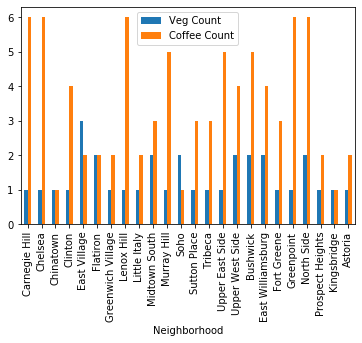

In [48]:
df_veg_coffee_size.plot(x="Neighborhood", y=["Veg Count", "Coffee Count"], kind="bar")

In [51]:
def get_parks_in_new_york():
    manhattan_parks = manhattan_venues[manhattan_venues['Venue Category'] == 'Park'].reset_index(drop=True)
    manhattan_parks['Borough'] = 'Manhattan'
    bronx_parks = bronx_venues[bronx_venues['Venue Category'] == 'Park'].reset_index(drop=True)
    bronx_parks['Borough'] = 'Bronx'
    brooklyn_parks = brooklyn_venues[brooklyn_venues['Venue Category'] == 'Park'].reset_index(drop=True)
    brooklyn_parks['Borough'] = 'Brooklyn'
    queens_parks = manhattan_venues[manhattan_venues['Venue Category'] == 'Park'].reset_index(drop=True)
    queens_parks['Borough'] = 'Queens'
    staten_island_parks = manhattan_venues[manhattan_venues['Venue Category'] == 'Park'].reset_index(drop=True)
    staten_island_parks['Borough'] = 'Staten Island'
    parks = pd.DataFrame()
    parks = parks.append(manhattan_parks)
    parks = parks.append(bronx_parks)
    parks = parks.append(brooklyn_parks)
    parks = parks.append(queens_parks)
    parks = parks.append(staten_island_parks)
    return parks

In [52]:
parks = get_parks_in_new_york()
parks.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
0,Washington Heights,40.851903,-73.936900,Highest Natural Point In Manhattan,40.852843,-73.937650,Park,Manhattan
1,Washington Heights,40.851903,-73.936900,Bennett Park,40.852967,-73.937874,Park,Manhattan
2,Inwood,40.867684,-73.921210,Isham Park,40.869647,-73.919210,Park,Manhattan
3,Inwood,40.867684,-73.921210,Inwood Hill Park,40.870858,-73.920129,Park,Manhattan
4,Hamilton Heights,40.823604,-73.949688,Riverside Park 138th St Entrance,40.823063,-73.954928,Park,Manhattan


In [55]:
parks_count = parks.groupby('Neighborhood').count()
parks_count = parks_count.reset_index()
parks_count = parks_count.rename(columns={"Borough": "Count"})
parks_count = parks_count[['Neighborhood', 'Count']]
parks_count.head()

,Neighborhood,Count
0,Bath Beach,1
1,Battery Park City,21
2,Bay Ridge,1
3,Bedford Park,1
4,Bedford Stuyvesant,1


In [63]:
veg_coffes_and_parks = pd.merge(parks_count, df_veg_coffee_size, on='Neighborhood')
veg_coffes_and_parks.shape[0]

7

In [64]:
veg_coffes_and_parks.head()

,Neighborhood,Count,Veg Count,Coffee Count,Borough
0,Chelsea,3,1,6,Manhattan
1,Clinton,3,1,4,Manhattan
2,East Village,3,3,2,Manhattan
3,Fort Greene,1,1,3,Brooklyn
4,Sutton Place,3,1,3,Manhattan


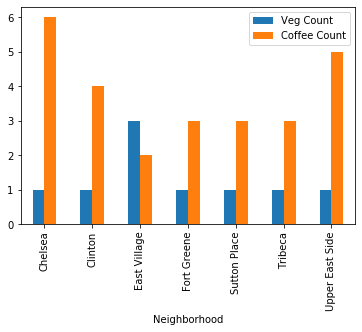

In [58]:
veg_coffes_and_parks.plot(x="Neighborhood", y=["Veg Count", "Coffee Count"], kind="bar")

Now we only have 7 out of 306 neighborhoods. Since 'East Village' is the only one with more than one Vegetarian / Vegan restaurant we select this neighborhoods because we would like to have more than one option to choose in our neighborhood

___

# CONCLUSION SECTION

So, after checking all the neighborhoods with at least one Vegetarian restaurant, and filter all the neighboords with at least one Coffee Shops as well we reduce from 306 neighborhoods to 24 neighborhoods. After that we looking for all the parks in New York and see how many of our remaining 24 neighborhoods have as well a park inside its area.
Finally we see in the above plot that there is only one neighborhoods with more than one Vegetarian Restaurant, so we decide that the best neighborhood to live according to our criteria is **East Village**

In [69]:
veg_coffes_and_parks_ll = pd.merge(veg_coffes_and_parks, neighborhoods[['Neighborhood','Latitude','Longitude']], on='Neighborhood')
veg_coffes_and_parks_ll.head()

,Neighborhood,Count,Veg Count,Coffee Count,Borough,Latitude,Longitude
0,Chelsea,3,1,6,Manhattan,40.744035,-74.003116
1,Chelsea,3,1,6,Manhattan,40.594726,-74.189560
2,Clinton,3,1,4,Manhattan,40.759101,-73.996119
3,East Village,3,3,2,Manhattan,40.727847,-73.982226
4,Fort Greene,1,1,3,Brooklyn,40.688527,-73.972906


In [77]:
veg_coffes_and_parks_ll.shape[0]

8

In [49]:
# create map of New York using latitude and longitude values
map_newyork2 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(veg_coffes_and_parks_ll['Latitude'], veg_coffes_and_parks_ll['Longitude'], veg_coffes_and_parks_ll['Borough'], veg_coffes_and_parks_ll['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    if neighborhood != 'East Village':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork2)
    else:
        folium.CircleMarker(
            [lat, lng],
            radius=10,
            popup="Selected neighborhood!",
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.3,
            parse_html=False).add_to(map_newyork2) 
map_newyork2

NameError: name 'veg_coffes_and_parks_ll' is not defined